# End to End Project Strategies

  steps
  
1. Preprocess+EDA+Eeature Selection
2. Extract input and outputs cols
3. Train test split
4. Scale the values
5. Train the model
6. Evaluate the model/model selection
7. Deploy the model

In [3]:
import pandas as pd
import numpy as np

In [4]:
f=pd.read_csv('placement-dataset.csv')
df=pd.DataFrame(f)
df

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
...,...,...,...,...
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1


In [5]:
df.isnull().sum().sum()

12

In [6]:
df=df.fillna(method="ffill")
df

C:\Users\Tej\AppData\Local\Temp\ipykernel_22396\1710101737.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method="ffill")


,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,5.9,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
...,...,...,...,...
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       100 non-null    float64
 2   iq         100 non-null    float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


## 1. Preprocess+EDA+Eeature Selection

In [14]:
 df=df.iloc[:,1:]
# every rows but exclude first column

In [16]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.9,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [18]:
import matplotlib.pyplot as plt

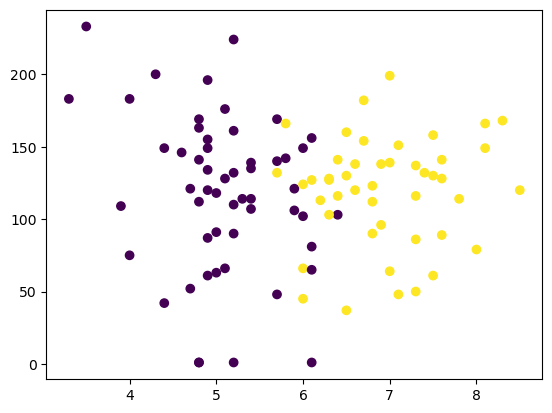

In [19]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

## 2. Extract input and outputs cols

In [21]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [25]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.9,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [27]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

## 3. Train test split

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [31]:
y_train

35    1
54    1
18    0
88    0
3     1
     ..
6     0
85    1
94    0
45    1
29    0
Name: placement, Length: 90, dtype: int64

## 4. Scale the values

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [35]:
x_train=scaler.fit_transform(x_train)

In [36]:
x_train

array([[ 0.7440754 , -0.54158297],
       [ 0.39208178,  0.58019764],
       [-1.71987993,  1.50401696],
       [-1.36788631,  0.75616322],
       [ 1.27206583,  0.38223635],
       [-1.36788631, -1.59737648],
       [-0.92789429, -0.60757006],
       [ 1.36006423,  0.95412451],
       [ 0.12808657, -1.09147542],
       [ 0.56807859,  0.51421054],
       [-0.48790227, -0.1676561 ],
       [ 0.65607699,  1.48202126],
       [ 1.18406742,  0.03030518],
       [ 1.44806264,  0.58019764],
       [-0.92789429, -1.17945821],
       [-1.01589269, -2.4992001 ],
       [-0.92789429,  0.75616322],
       [ 0.12808657, -2.4992001 ],
       [-1.01589269,  0.58019764],
       [-0.92789429,  0.11828798],
       [-0.83989588, -1.13546682],
       [ 1.00807061, -1.46540229],
       [ 0.56807859,  0.11828798],
       [-0.92789429,  0.42622775],
       [-0.48790227,  0.44822345],
       [-0.22390705,  0.55820194],
       [-0.92789429,  0.88813741],
       [ 0.04008816,  0.75616322],
       [-1.01589269,

In [37]:
x_test=scaler.transform(x_test)

In [45]:
x_test

array([[-1.45588472,  1.87794383],
       [ 1.00807061,  0.80015462],
       [-0.22390705,  1.19607719],
       [-0.48790227,  0.53620624],
       [-0.48790227, -0.01368621],
       [ 0.92007221,  1.85594813],
       [-2.15987195,  2.60380187],
       [ 0.04008816,  0.20627077],
       [ 0.8320738 , -0.40960878],
       [ 1.18406742, -0.62956576]])

## 5. Train the model

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
clf=LogisticRegression()

In [52]:
clf.fit(x_train,y_train)

LogisticRegression()

## 6. Evaluate the model/model selection

In [55]:
pre=clf.predict(x_test)

In [57]:
y_test

95    0
21    1
84    0
12    0
41    0
26    1
50    0
27    1
66    1
90    1
Name: placement, dtype: int64

In [59]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test,pre)

0.9

In [65]:
import pickle

In [67]:
pickle.dump(clf,open('model.pkl','wb'))